<a href="https://colab.research.google.com/github/MarianaVilasBoas/Portfolio/blob/main/Analisando_os_Dados_do_Airbnb_ipynb_Nova_Iorque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Nova Iorque*

Todos sabem que Nova Iorque é um **famoso destino turístico** e muito visitado por brasileiros. Mas vocês sabiam que o **Airbnb** é responsável por **arrecadar** em média **$ 632 milhões anuais** em **atividades econômicas** na cidade? 

<center><img alt="Analisando Airbnb" width="55%" src="https://cdn.pixabay.com/photo/2017/02/11/11/27/nyc-2057534_960_720.jpg"></center>


As propriedades do Airbnb estão **distribuídas** nos 5 distritos de Nova Iorque, sendo **82%** dos **imóveis** localizados **fora da principal área turística**. Essa disposição **incentiva** os visitantes a **explorarem bairros** que antes **não se beneficiavam do turismo**, contribuindo para o **desenvolvimento** das **economias locais** visto que o **hóspede do Airbnb** **gasta em média $ 740** no **bairro** onde se **hospeda**.

Apesar do impacto econômico positivo que o Airbnb gera em Nova Iorque, em **2019** foi **aprovada** uma **lei** que **proíbe a sublocação por menos de 30 dias** quando o **inquilino** estiver **ausente** no imóvel. O conselho de Nova Iorque defende que os **aluguéis de curto prazo** do Airbnb contribuiam para o **aumento dos aluguéis** e **gentrificação**.  As **penalidades** para aqueles que **descumprirem a lei** são **severas** e as violações podem resultar em **despejo** do hóspede e **multas** ao **responsável do anúncio**.

Essa lei **mudou** o **panorama** dos **anúncios do Airbnb**, e por isso, vou **estudar** os **dados** referente à cidade de Nova Iorque e **extrair insights** do **atual impacto** do Airbnb **no turismo** na cidade que nunca dorme.

fontes: [Airbnb](https://blog.atairbnb.com/airbnbs-economic-impact-nyc-community/) , 
[Isto é](https://www.istoedinheiro.com.br/airbnb-chega-a-acordo-com-prefeitura-de-nova-york-para-compartilhar-informacao/) ,
[NYC.gov](https://www1.nyc.gov/site/specialenforcement/stay-in-the-know/information-for-hosts.page)

## Obtenção dos Dados
Todos os dados usados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) e publicados em 02-Jun-21.

* `listings.csv` - *Summary information and metrics for listings in New York City (good for visualisations).*

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importar o arquivo listings.csv para um DataFrame
df=pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-04-07/visualisations/listings.csv")

## Análise dos Dados

Primeiro analisei as cinco primeiras entradas do _dataset_ para visualizar melhor as variáveis

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.35,3,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,76,1,396,2021-03-19,4.98,1,198
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.35,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,7,1,2014-01-02,0.01,1,79
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,79,2,474,2020-09-25,3.26,1,355


### **Análise das Variáveis**

Verifiquei, então, o volume dos dados e os tipos das variáveis

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t",df.shape[0])
print("Variáveis\t",df.shape[1])

# verificar as 5 primeiras entradas do dataset
print("\n\n Tipos Variáveis\n",df.dtypes)

Entradas:	 36905
Variáveis	 16


 Tipos Variáveis
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


A partir dessas informações montei um dicionário a fim de facilitar a análise do _dataset_.

######**Dicionário das variáveis**

* **id** - número de indentificação do imóvel
* **name** - nome do anúncio do imóvel
* **host_name** - nome do proprietário do imóvel
* **neighbourhood_group** - nome do distrito
* **neighbourhood** - nome do bairro
* **latitude** - coordenada da latitude do imóvel
* **longitude** - coordenada da longitude do imóvel
* **room_type** - tipo de quarto que é oferecido
* **price** - preço da diária do imóvel
* **minimum_nights** - número mínimos de noites para aluguel
* **number_of_reviews** - número de reviews que o imóvel possui
* **last_reviews** - data do último review
* **reviews_per_month** - número de reviews por mês
* **calculated_host_listing_counts** - quantidade de imóveis anunciados do mesmo proprietário
* **availability_365** - número de dias no ano que o imóvel fica disponível para locação

### **Valores Ausentes**

Verifiquei o percentual dos valores nulos para entender se eram significativos em relação ao total de entradas.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.263379
last_review                       0.263379
host_name                         0.034358
name                              0.000352
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* É possível ver que as colunas `reviews_per_month` e `last_review` possuem 26% dos seus valores nulos. 
* A variável `host_name` têm aproximadamente 3% dos valores nulos, enquanto a variável `name` possui cerca de 0,03%.

Como as variáveis que apresentaram valores ausentes são secundárias na análise decidi deixar a base de dados original.

### **Distribuição das Variáveis** 
Para analisar a distribuição das variáveis e verificar se há sinais de outliers plotei os seguintes histogramas

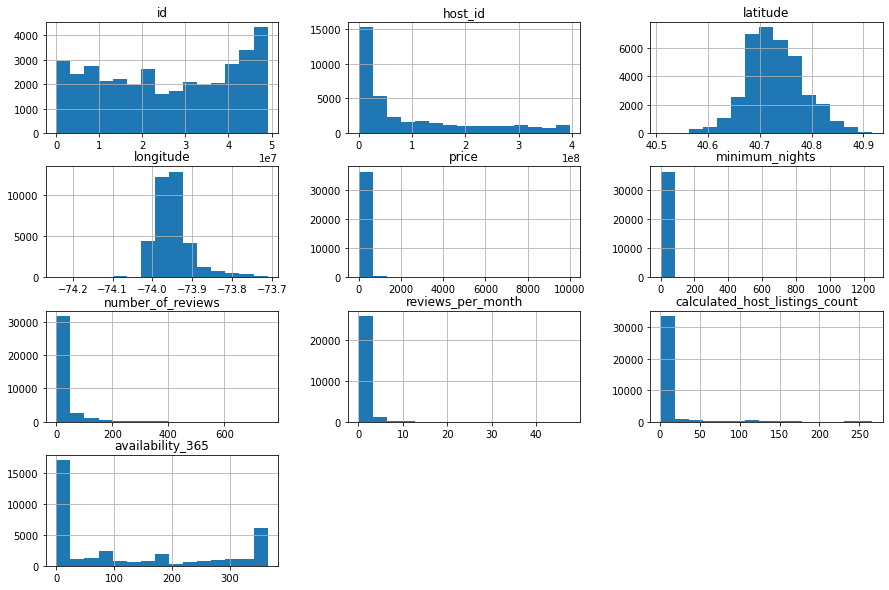

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,figsize=(15,10));

Com base nos histogramas foi possível verificar indícios da presença de *outliers* nas variáveis `price`, `minimum_nights` e `number_of_reviews` que serão fundamentais na análise, os valores não seguem uma distribuição e distorcem a representação gráfica.

### **Outliers**
Para confirmar a presença de outliers, analisei a distribuição estatística das variáveis:

In [7]:
#distribuição estatística das variáveis
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36905.000000,36905.000000,36905.000000,27185.000000,36905.000000,36905.000000
mean,148.559274,23.123235,22.668636,0.854783,11.071318,123.697087
std,290.379973,26.546473,48.003378,1.349439,36.699390,143.178789
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,61.000000,4.000000,0.000000,0.100000,1.000000,0.000000
50%,100.000000,30.000000,4.000000,0.340000,1.000000,54.000000
75%,160.000000,30.000000,20.000000,1.090000,3.000000,269.000000
max,10000.000000,1250.000000,755.000000,47.600000,266.000000,365.000000


Com base no resumo estatístico percebi que:

* A variável `price` possui 75% do valor abaixo de 160, porém o seu valor máximo nessa base de dados é 10000, indicando uma grande dispersão dos dados. Além disso possui como preço mínimo 0.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias, o que não poderia ocorrer visto que o máximo de dias que o imóvel pode ficar disponível no ano são 365 dias.
* A variável `number_of_reviews` possui 75% do valor abaixo de 20, entretanto o valor máximo registrado é de 755

Para indentificar os outliers calculei o IQR das variáveis definindo, assim, os limites superiores e inferiores para retirá-los:

#### IQR para price



In [8]:
#identificar os outliers da variável price
q1_price=df.price.quantile(.25)
q3_price=df.price.quantile(.75)
IQR_price= q3_price - q1_price

print("IQR da variável price:",IQR_price)

IQR da variável price: 99.0


In [9]:
#definir os limites 
sup_price= q3_price + 1.5 * IQR_price
inf_price= q1_price - 1.5 * IQR_price

print("Limite superior de price:",sup_price)
print("Limite inferior de price:",inf_price)

Limite superior de price: 308.5
Limite inferior de price: -87.5


A partir dos limites calculados da variável `price` foi possível perceber que não há outliers na parte inferior, mas ainda há dados com preço 0 que devem ser tratados.

#### IQR para minimum_nights

In [10]:
#indentificar os outliers para variável minimum_nights
q1_min=df.minimum_nights.quantile(.25)
q3_min=df.minimum_nights.quantile(.75)
IQR_min= q3_min - q1_min

print("IQR da variável minimum_nights:",IQR_min)

IQR da variável minimum_nights: 26.0


In [11]:
#definir os limites
sup_min= q3_min + 1.5 * IQR_min
inf_min= q1_min - 1.5 * IQR_min

print("Limite superior de minimum_nights",sup_min)
print("Limite inferior de minimum_nights",inf_min)

Limite superior de minimum_nights 69.0
Limite inferior de minimum_nights -35.0


#### IQR para number_of_reviews

In [12]:
q1_num=df.number_of_reviews.quantile(0.25)
q3_num=df.number_of_reviews.quantile(0.75)
IQR_num= q3_num - q1_num

print("IQR da variável number_of_reviews:",IQR_num)

IQR da variável number_of_reviews: 20.0


In [13]:
#definir os limites
sup_num= q3_num + 1.5 * IQR_min
inf_num= q1_num - 1.5 * IQR_min

print("Limite superior de number_of_reviews",sup_num)
print("Limite inferior de number_of_reviews",inf_num)

Limite superior de number_of_reviews 59.0
Limite inferior de number_of_reviews -39.0


Para verificar o impacto da retirada dos outliers das variáveis em questão plotei o Diagrama de Caixas a fim de analisar a variação dos dados de forma mais visual:

#### Boxplot para price


price: valores acima de 308.5
2357 entradas
6.3867%


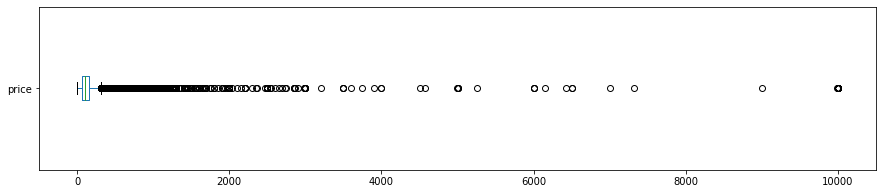

In [14]:
#bloxplot para preço
df.price.plot(kind="box",vert=False,figsize=(15,3))

# ver quantidade de valores acima de 308.5 para price
print("\nprice: valores acima de 308.5")
print("{} entradas".format(len(df[df.price > 308.5])))
print("{:.4f}%".format((len(df[df.price > 308.5]) / df.shape[0])*100))

#### Boxplot para minimum_nights


minimum_nights: valores acima de 69.0
494 entradas
1.3386%


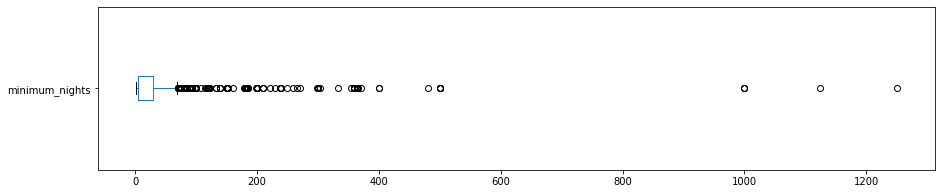

In [15]:
#boxplot para minimum_nights
df.minimum_nights.plot(kind='box',vert=False,figsize=(15,3))

#ver a quantidade de valores acima de 69.0 dias para minimum_nights
print("\nminimum_nights: valores acima de 69.0")
print("{} entradas".format(len(df[df.minimum_nights > 69.0])))
print("{:.4f}%".format((len(df[df.minimum_nights > 69.0]) / df.shape[0])*100))

#### Boxplot para number_of_reviews


minimum_nights: valores acima de 59.0
694 entradas
1.8805%


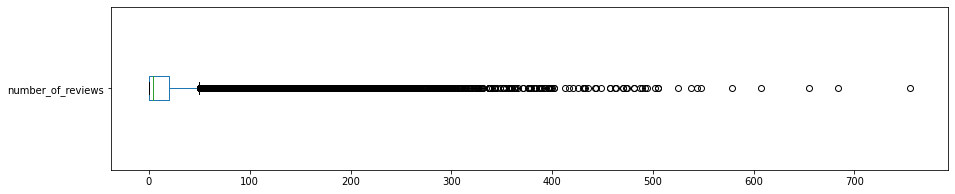

In [16]:
#boxplot para number_of_reviews
df.number_of_reviews.plot(kind='box',vert=False,figsize=(15,3))

#ver a quantidade de valores acima de 59 dias para number_of_reviews
print("\nminimum_nights: valores acima de 59.0")
print("{} entradas".format(len(df[df.minimum_nights > 59.0])))
print("{:.4f}%".format((len(df[df.minimum_nights > 59.0]) / df.shape[0])*100))

#### Tratamento dos dados
Após definir os limites superiores e inferiores das variáveis retirei os dados que não estavam contidos entre as extremidades:

In [17]:
df_clean=df.copy()
df_clean.drop(df_clean[df_clean.price>308.5].index,axis=0,inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>69.0].index,axis=0,inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews>59.0].index,axis=0,inplace=True)

print('Entradas antes da limpeza:',df.shape[0])
print('Entradas após a limpeza:',df_clean.shape[0])

Entradas antes da limpeza: 36905
Entradas após a limpeza: 29930


#### Boxplot dados tratados

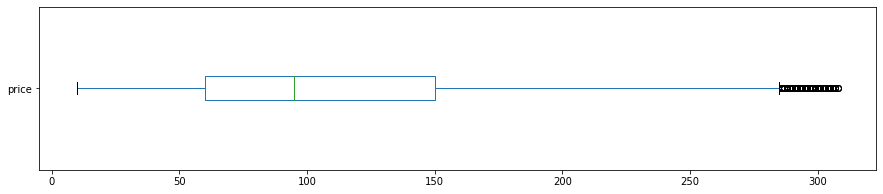

In [18]:
#bloxplot para preço após limpeza
df_clean.price.plot(kind="box",vert=False,figsize=(15,3))

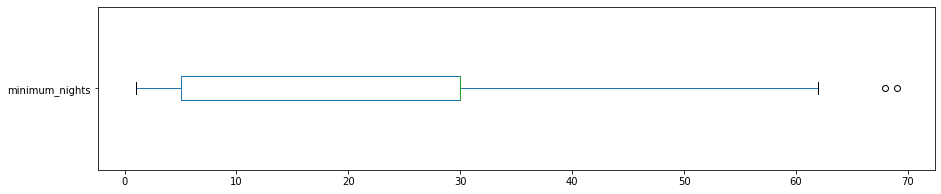

In [19]:
#bloxplot para minimum_nights
df_clean.minimum_nights.plot(kind='box',vert=False,figsize=(15,3))

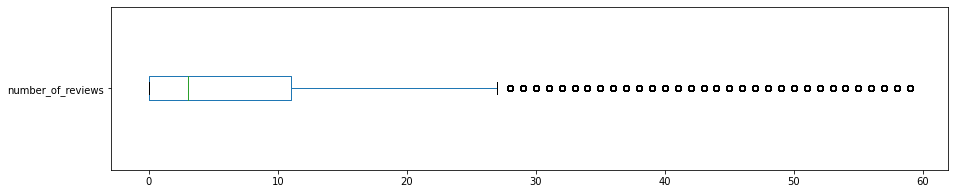

In [20]:
#bloxplot para number_of_reviews
df_clean.number_of_reviews.plot(kind='box',vert=False,figsize=(15,3))

Apesar do boxplot das variáveis `price` e `number_of_reviews` ainda mostrarem alguns dados como outliers, estes estão sendo calculados em relação ao novo dataset. A limpeza levou em consideração os quartis dos dados originais.

#### Histogramas sem *outliers*
Para garantir que não há outliers que vão prejudicar a análise plotei os histogramas novamente para verificar as 'novas' distribuições.

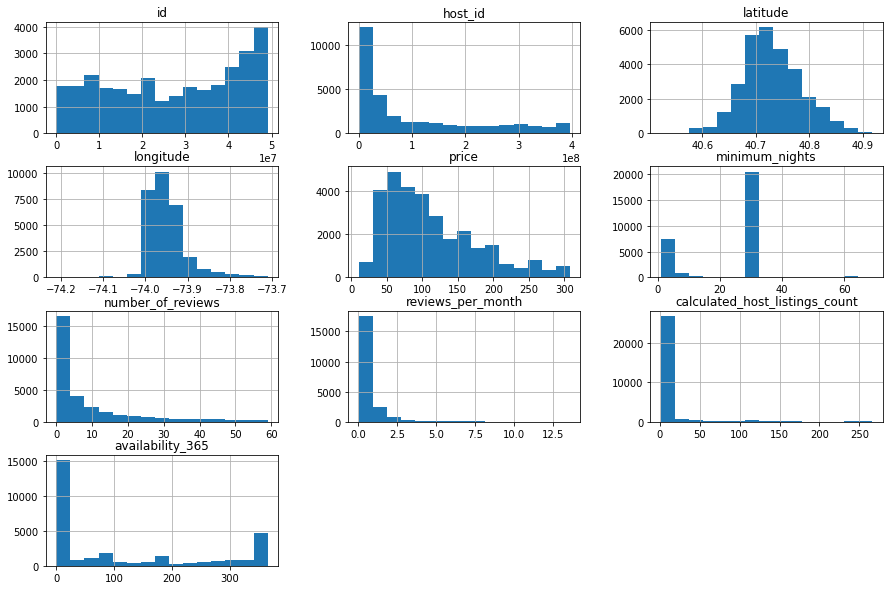

In [21]:
df_clean.hist(bins=15,figsize=(15,10));

Agora, com a base de dados 'limpa', comecei a realizar a análise efetivamente olhando para a correlação das variáveis:

### **Correlação existente entre as variáveis**

Para analisar a correlação entra as variáveis plotei uma Matriz de Correlação

In [22]:
# criar uma matriz de correlação
corr=df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.013677,0.018081,-0.009716,-0.008216,0.014746
minimum_nights,-0.013677,1.000000,-0.234135,-0.433624,0.110872,-0.107749
number_of_reviews,0.018081,-0.234135,1.000000,0.453334,-0.136550,0.065876
reviews_per_month,-0.009716,-0.433624,0.453334,1.000000,0.046732,0.181411
calculated_host_listings_count,-0.008216,0.110872,-0.136550,0.046732,1.000000,0.248375
availability_365,0.014746,-0.107749,0.065876,0.181411,0.248375,1.000000


A partir do mapa de calor identifiquei que não há nenhuma correlação forte (acima de |0.7|).

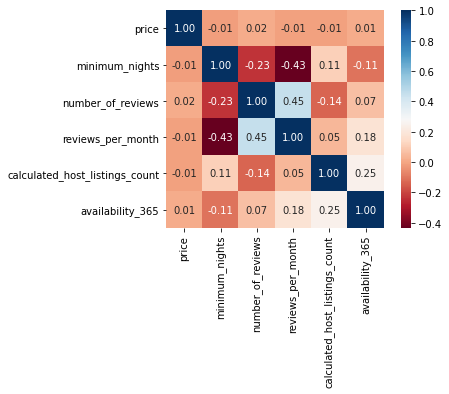

In [23]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr,cmap='RdBu',fmt='.2f',square=True,annot=True,linecolor='white')

Resolvi, então, estudar mais a fundo algumas variáveis na tentativa de extrair insights. Para isso observei os seguintes tópicos:

* Média dos preços de aluguel
* Tipo de imóvel mais anunciado no Airbnb
* Média do número mínimo de noites
* Localidade mais cara do dataset (dividida por distritos)

### **Média dos preços de aluguel**

In [24]:
# ver a média da coluna `price`
df_clean.price.mean()

110.44637487470766

### **Tipo de imóvel mais anunciado no Airbnb**

A partir do percentual do tipo de imóvel disponível no Airbnb é possível perceber que a **proporção de imóveis inteiros** para se alugar é **muito próxima** aos anúncios dos **quartos privativos**. O que é curioso, uma vez que os quartos privativos por não se tratarem do imóvel como um todo podem ser alugados por menos de 30 dias conforme lei, enquanto as casas inteiras não pois os inquilinos não estariam presentes no local.

In [25]:
# mostrar a quantidade de cada tipo de imóvel disponível
(df_clean.room_type.value_counts()/df.shape[0])*100

Entire home/apt    40.035226
Private room       39.132909
Shared room         1.566183
Hotel room          0.365804
Name: room_type, dtype: float64

Com base na nova lei resolvi analisar os tipos de imóveis em dois grupos:

* estadia mínima igual ou superior a 30 dias
* estadia mínima inferior a 30 dias

In [87]:
#analisar tipo de imóveis com mininum_nights igual ou superior a 30 dias
(df_clean[df_clean.minimum_nights>=30].room_type.value_counts()/df.shape[0])*100

Entire home/apt    28.226528
Private room       27.028858
Shared room         1.024251
Hotel room          0.094838
Name: room_type, dtype: float64

In [90]:
#analisar tipo de imóveis com mininum_nights inferior a 30 dias
(df_clean[df_clean.minimum_nights<30].room_type.value_counts()/df.shape[0])*100

Private room       12.104051
Entire home/apt    11.808698
Shared room         0.541932
Hotel room          0.270966
Name: room_type, dtype: float64

* Os percentuais de Entire home/apt e Private room se mantém muito próximos independente da estadia mínima exigida.

### **Média do mínimo de noites para aluguel (minimum_nights)**

Calculei, então, a média do número de noites que é elevada, aproximadamente 22 dias, havendo um indício que a maioria dos anúncios tem número mínimo de noites iguais ou superior a 30 dias conforme orienta a lei.

In [27]:
# ver a média de `minimum_nights`
df_clean.minimum_nights.mean()

22.347711326428332

Comparei, então, o número de anúncios com diárias inferiores e mínimas de 30 dias para confirmar a hipótese:

In [28]:
#analisar quantidade de imóveis com mininum_nights superior a 30 dias
print("A quantidade de imóveis com diária mínima superior a 30 dias são:",df_clean[df_clean.minimum_nights>=30].shape[0])

#analisar quantidade de imóveis com mininum_nights inferior a 30 dias
print("A quantidade de imóveis com diária mínima inferior a 30 dias são:",df_clean[df_clean.minimum_nights<30].shape[0])

A quantidade de imóveis com diária mínima superior a 30 dias são: 20805
A quantidade de imóveis com diária mínima inferior a 30 dias são: 9125


* Como podemos ver, a quantidade de **imóveis** com **estadia mínima** igual ou superior a **30 dias** é mais que o **dobro** dos anunciados com locação **inferior** a **30 dias**.

Analisei, então, os **quartos privativos de acordo** com a **estadia mínima** e o **número de anúncios** com **permanência igual ou superior a 30 dias** é **quase o dobro** dos **inferiores a 30 dias**. O que é curioso, uma vez que os quartos privativos contam com a presença do inquilino no imóvel e poderiam ser alugados por períodos menores.

In [96]:
#mostrar quartos inteiros de acordo com mininum_nights
df_quarto=df_clean[df_clean.room_type=='Private room']

print('Quartos Inteiros:')
print('Igual ou acima de 30 dias:\t',df_quarto[df_quarto.minimum_nights>=30].value_counts().sum())
print('Inferior a 30 dias:\t\t',df_quarto[df_quarto.minimum_nights<30].value_counts().sum())

Quartos Inteiros:
Igual ou acima de 30 dias:	 6132
Inferior a 30 dias:		 3373


### **Localidade mais cara do dataset**

Para evitar dados de bairros que não sejam representativos, com poucas entradas, agrupei os dados por distrito a fim de otimizar a análise:


In [29]:
#definir contador para verificar quantos imóveis tem em cada distrito
df_contador=df_clean.copy()
df_contador['número_anúncios']=1

#definir um df agrupado por distrito
df_distrito=df_contador.groupby('neighbourhood_group').sum()
df_distrito

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,número_anúncios
neighbourhood_group,,,,,,,,,,,
Bronx,26536734623,121145833477,33047.599500,-59771.51309,70523,12860,9821,500.78,3431,142161,809
Brooklyn,308106548879,1033409784885,485083.118080,-881706.40466,1194624,266708,106186,4337.50,56429,1161148,11923
Manhattan,348410472095,1330202738932,531002.749060,-963593.68159,1695328,307298,100995,4616.67,238055,1511096,13026
Queens,125779330071,567984217533,160891.933117,-291796.95318,323703,79008,38293,1985.85,67331,540896,3950
Staten Island,7085536691,32298808592,9016.095720,-16450.98426,21482,2993,2987,156.70,560,39291,222


In [30]:
#calcular preço médio de aluguel por distrito
df_distrito["diaria_media"] = df_distrito["price"]/df_distrito["número_anúncios"]

#calcular número de avaliações por distrito
df_distrito["avaliacoes_media"]=df_distrito["number_of_reviews"]/df_distrito["número_anúncios"]

#calcular número médio de noites mínimas por distrito:
df_distrito["estadia_media"]=df_distrito["minimum_nights"]/df_distrito["número_anúncios"]

df_distrito

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,número_anúncios,diaria_media,avaliacoes_media,estadia_media
neighbourhood_group,,,,,,,,,,,,,,
Bronx,26536734623,121145833477,33047.599500,-59771.51309,70523,12860,9821,500.78,3431,142161,809,87.173053,12.139679,15.896168
Brooklyn,308106548879,1033409784885,485083.118080,-881706.40466,1194624,266708,106186,4337.50,56429,1161148,11923,100.194917,8.905980,22.369202
Manhattan,348410472095,1330202738932,531002.749060,-963593.68159,1695328,307298,100995,4616.67,238055,1511096,13026,130.149547,7.753339,23.591125
Queens,125779330071,567984217533,160891.933117,-291796.95318,323703,79008,38293,1985.85,67331,540896,3950,81.950127,9.694430,20.002025
Staten Island,7085536691,32298808592,9016.095720,-16450.98426,21482,2993,2987,156.70,560,39291,222,96.765766,13.454955,13.481982


In [65]:
#plotar dados de preço médio, número médio de avaliações e estadia mínima por distritro

#importar pacotes necessários
import plotly.graph_objects as go
import plotly.figure_factory as ff

#adicionar dados à tabela
info_distritos = [['Distrito', 'Preço', 'Número de Avaliações', 'Estadia Mínima'],
                 ['Bronx', 87.173053, 12.139679, 15.896168],
                 ['Brooklyn', 100.194917, 8.905980, 22.369202],
                 ['Manhattan', 130.149547, 7.753339, 23.591125],
                 ['Queens', 81.950127, 9.694430, 20.002025],
                 ['Staten Island', 96.765766, 13.454955, 13.481982]]

#definir figura com dados dos distritos
fig = ff.create_table(info_distritos, height_constant=60)

#adicionar dados ao gráfico
distritos = ['Bronx', 'Brooklyn', 'Manhattan',
         'Queens', 'Staten Island']
preco_medio = [87.173053, 100.194917, 130.149547, 81.950127, 96.765766]
avaliacoes_media = [12.139679, 8.905980, 7.753339, 9.694430, 13.454955]
estadia_min = [15.896168, 22.369202, 23.591125, 20.002025, 13.481982]

#inserir colunas no gráfico
trace1 = go.Bar(x=distritos, y=preco_medio, xaxis='x2', yaxis='y2',
                marker=dict(color='#0099ff'),
                name='Preço Médio')
trace2 = go.Bar(x=distritos, y=avaliacoes_media, xaxis='x2', yaxis='y2',
                marker=dict(color='#404040'),
                name='Número Médio de Avaliações')

trace3 = go.Bar(x=distritos, y=estadia_min, xaxis='x2', yaxis='y2',
                marker=dict(color='#FF7F00'),
                name='Estadia Mínima')

#adicionar colunas na figura
fig.add_traces([trace1, trace2, trace3])

#verificar
# inicializar xaxis2 e yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

#editar layout para subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

#yaxis2 deve ser ancorado ao xaxis2 e vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Informações'})

#atualizar as margens para adicionar um título e ver os rótulos x do gráfico
fig.layout.margin.update({'t':75, 'l':50})
fig.layout.update({'title': 'Dados por Distritos'})

#atualizar a altura porque adicionar um gráfico verticalmente irá interagir com a altura do gráfico calculada para a mesa
fig.layout.update({'height':800})

#plot
fig.show()

A partir do do gráfico e da tabela construídos conclui que:
* Distritos tradicionalmente famosos como Manhattan e Brooklyn possuem as diárias mais elevadas seguidos por Staten Island, Bronx e Queens.
* Os dois distritos com diárias mais elevadas, Manhattan e Brooklyn, possuem as maiores estadias mínimas exigidas e, por conseguinte, valor mínimo por estadia mais elevados. Acredito que os menores números de avaliações em média se devem a esse fato.
* Queens apesar de ser o distrito com a diária mais barata, possui uma estadia mínima bem mais elevada, em torno de 5 / 6 dias a mais, do que o Bronx e Staten Island, segunda e terceira diárias mais baratas, nessa ordem.
* Bronx e Staten Island parecem ser os distritos 'queridinhos' pois possuem as menores estadias mínimas e preços intermediários em comparação com os demais distritos, além dos maiores números de avaliações médias.

A partir dessa análise resolvi testar a correlação entre o valor mínimo por estadia com o número de avaliações:

* Primeiro testei a correlação para a base de dados como um todo e não obtive nenhuma correlação significativa

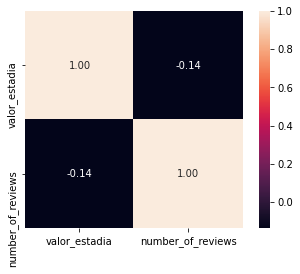

In [112]:
#correlação valor mínimo por estadia x número de avaliações
df_corr=df_clean.copy()
df_corr['valor_estadia']=df_corr.price * df_corr.minimum_nights

#calcular correlação
corr_2=df_corr[['valor_estadia','number_of_reviews']].corr()

sns.heatmap(corr_2,annot=True,fmt='.2f',square=True)

* Em seguida, testei a **correlação** para a base de dados dividida **por distrito** e obtive uma **corelação forte** de **-0.89**, **comprovando** a **hipótese** de que **quanto maior o valor mínimo médio por estadia** de um imóvel **por distrito**, **menor o número de avaliações** que ele possui.

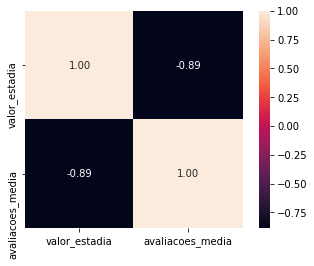

In [111]:
#correlação valor mínimo médio por estadia x número de avalições por distrito
df_corr2=df_distrito.copy()
df_corr2['valor_estadia']=df_corr2.diaria_media * df_corr2.estadia_media

#calcular correlação
corr_3=df_corr2[['valor_estadia','avaliacoes_media']].corr()

sns.heatmap(corr_3,annot=True,fmt='.2f', square=True)

#### Mapa dos imóveis de Nova Iorque anunciados no Airbnb
Com base nas latitudes e longitudes dos imóveis, plotei um **gráfico** onde **cada imóvel** anunciado **representa um ponto** e suas **cores variam** de acordo com o **preço da diária do aluguel**, conforme a régua a direita do gráfico. Isto é, quanto mais cara a diária do imóvel mais avermelhado é o ponto e quanto mais barata mais azulado.

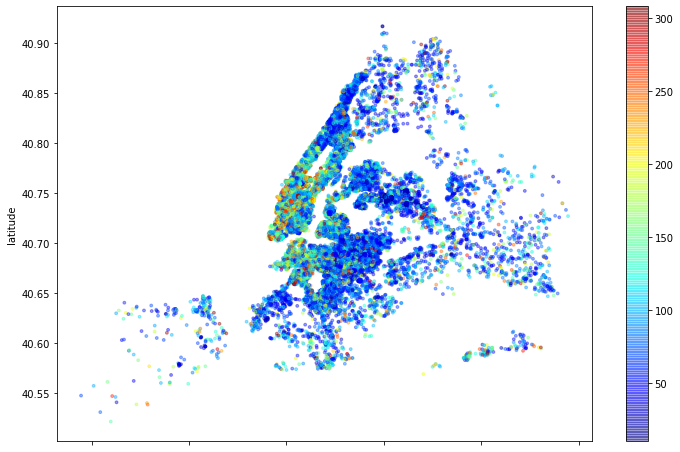

In [54]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,c=df_clean['price'],s=8,cmap=plt.get_cmap('jet'),figsize=(12,8))

Comparando o gráfico acima com o mapa de Nova Iorque por distrito, as regiões que mais apresentam pontos avermelhados são os distritos de Manhattan (parte esquerda superior do gráfico) e Brooklyn (parte central do gráfico) e, portanto, possuem as diárias mais elevadas conforme constatamos acima.

# Conclusões
* Há uma **correlação negativa forte** de -0.89 entre o **valor mínimo médio da estadia** com o **número de avaliações médio do imóvel**, comprovando que quanto maior o preço médio do imóvel e o número mínimo médio de noites menor a quantidade de avaliações. **(Análise válida apenas por distrito!)**
* Como vimos, a quantidade de **imóveis** com **estadia mínima** igual ou superior a **30 dias** é mais que o **dobro** dos anunciados com locação **inferior** a **30 dias**, indicando que os proprietários de imóveis do Airbnb em Nova Iorque utilizam a plataforma com **foco** em aluguéis prolongados. Isso **comprova** que o **público alvo** dos **anúncios** do Airbnb em Nova Iorque **não são** os **turistas** que, por sua vez, usualmente viajam em **média 9 dias** conforme informado em [pesquisa](https://qz.com/954413/new-york-city-needs-foreign-tourists-because-they-spend-more/) realizada em 2017 pela **NYC & Company** organização oficial de marketing, turismo e parceria da cidade de Nova Iorque.
* O **curioso** é que os **percentuais** de **tipos de imóveis** anunciados (Entire Home/Apt e Private Room)  se mantém **muito próximos independendo** da **estadia mínima exigida**, podendo haver um **índicio** que muitos proprietários alugam quartos como uma **renda extra mensal** ou até mesmo que seja algo **cultural**.
* **Acreditava** que os **anúncios** de **Private room** por terem o inquilino no local, seriam em sua **maioria** com **estadia mínima inferior a 30 dias**, para **englobar** como público os **turistas**, mas foi **comprovado** justamente o **contrário**. Anúncios de Private room com **estadia igual ou superior a 30 dias** são **quase o dobro** dos **inferiores a 30 dias**, evidenciando, novamente, que o **foco** dos inquilinos é mais **regional**.